In [2]:
#import packages
import os
import pandas as pd
import numpy as np
from numpy import mean, std, cov 
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import spearmanr


from __future__ import division 
import sys
import scipy
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
print(sys.executable)
!{sys.executable} -m pip install homebrew

/Users/jordansiegel/opt/anaconda3/bin/python


In [4]:
#set paths

current_dir = os.getcwd()
print(current_dir)

/Users/jordansiegel/Documents/GitHub/WTP_Rejection_Choice


In [5]:
#import the individual difference measure csvs
#scoringpath = os.chdir('/mnt/disk01/farerilab/GitHub/WTP_Rejection_Choice/scoring')
scoringpath = os.chdir('/users/jordansiegel/Documents/GitHub/WTP_Rejection_Choice/scoring')

aq = pd.read_csv('aq.csv')
ntbs = pd.read_csv('ntbs.csv')
rsq = pd.read_csv('rsq.csv')
scs = pd.read_csv('scs.csv')
mspss = pd.read_csv('mspss.csv')
brcs = pd.read_csv('brcs.csv')
pss = pd.read_csv('pss.csv')
srq = pd.read_csv('srq.csv')
dii = pd.read_csv('DII.csv')
rr = pd.read_csv('rr.csv')
ucla = pd.read_csv('ucla.csv')

In [6]:
print(ntbs)
print(rsq)

                 Prolific_ID  NTBS_score
0   59d5888d21977e0001d630f3          27
1   5a09ebdf087f2e0001eae39f          32
2   5c5c451500b69200011bb8bf          32
3   5c9d004ee3b6c40015254526          32
4   5cc3f0f9fdb33500018c5eeb          30
..                       ...         ...
93  67094d6215b6d0fe3e8c3e39          34
94  670d326c55fa3d6f10ebe253          36
95  6711f493bfc7c4e11953872d          41
96  671469967e2a4f2e612e3846          34
97  6722ca2b1f3ebd2d544608c3          33

[98 rows x 2 columns]
                 Prolific_ID  RSQ_finalscore
0   59d5888d21977e0001d630f3          10.250
1   5a09ebdf087f2e0001eae39f           9.000
2   5c5c451500b69200011bb8bf          10.750
3   5c9d004ee3b6c40015254526          16.875
4   5cc3f0f9fdb33500018c5eeb           5.750
..                       ...             ...
93  67094d6215b6d0fe3e8c3e39           9.625
94  670d326c55fa3d6f10ebe253           9.750
95  6711f493bfc7c4e11953872d          12.375
96  671469967e2a4f2e612e3846       

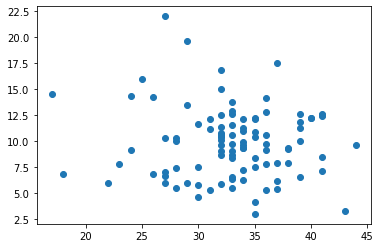

[[25.5351357  -0.99704134]
 [-0.99704134 11.62944621]]
Spearmans correlation: 0.015
p value: 0.8856
Spearman correlation = 0.015, p = 0.8856
No significant monotonic association between NTBs and R².


In [7]:
# prop_socialchoice_ // AQ
pyplot.scatter(ntbs['NTBS_score'],rsq['RSQ_finalscore'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rsq['RSQ_finalscore'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rsq['RSQ_finalscore'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rsq['RSQ_finalscore'])
print('p value: %.4f' % p)

print(f'Spearman correlation = {corr:.3f}, p = {p:.4f}')
if p < 0.05:
    print("There is a significant monotonic association between NTBs and R².")
else:
    print("No significant monotonic association between NTBs and R².")


In [8]:
wtp_pca = ''
wtp_pca = pd.DataFrame()
wtp_pca['Prolific_ID'] = aq['Prolific_ID']
wtp_pca['aq'] = aq['AQ']
wtp_pca['ntbs'] = ntbs['NTBS_score']
wtp_pca['rsq'] = rsq['RSQ_finalscore']
wtp_pca['scs'] = scs['SCS_score']
wtp_pca['srqadmiration'] = srq['SRQ_admiration']
wtp_pca['srqnegativesocpot'] = srq['SRQ_negsocpot']
wtp_pca['srqsexualbehavior'] = srq['SRQ_sexrel']
wtp_pca['srqprosocial'] = srq['SRQ_prosocint']
wtp_pca['srqsociability'] = srq['SRQ_sociability']
wtp_pca['mspss'] = mspss['MSPSS_score']
ids = wtp_pca['Prolific_ID']

wtp_pca = pd.DataFrame(data=wtp_pca)
wtp_pca = wtp_pca.drop(['Prolific_ID'], axis =1)
wtp_pca.index = ids
measures = wtp_pca.columns
print(wtp_pca)

                          aq  ntbs     rsq  scs  srqadmiration  \
Prolific_ID                                                      
59d5888d21977e0001d630f3  14    27  10.250  107           5.75   
5a09ebdf087f2e0001eae39f  13    32   9.000   88           5.50   
5c5c451500b69200011bb8bf  23    32  10.750   83           5.75   
5c9d004ee3b6c40015254526   7    32  16.875   99           5.75   
5cc3f0f9fdb33500018c5eeb  24    30   5.750   90           4.50   
...                       ..   ...     ...  ...            ...   
67094d6215b6d0fe3e8c3e39  16    34   9.625   98           6.00   
670d326c55fa3d6f10ebe253  26    36   9.750   79           6.75   
6711f493bfc7c4e11953872d  23    41  12.375   56           7.00   
671469967e2a4f2e612e3846  16    34   9.375   87           7.00   
6722ca2b1f3ebd2d544608c3  20    33  11.500   57           7.00   

                          srqnegativesocpot  srqsexualbehavior  srqprosocial  \
Prolific_ID                                                  

In [9]:
#sample size
sample_size = len(wtp_pca)
print(sample_size
     )

98


In [10]:
#transpose dataframe so that the rows represent measures and columns represent each participant
wtp_pca = wtp_pca.transpose()
print(wtp_pca)

Prolific_ID        59d5888d21977e0001d630f3  5a09ebdf087f2e0001eae39f  \
aq                                14.000000                 13.000000   
ntbs                              27.000000                 32.000000   
rsq                               10.250000                  9.000000   
scs                              107.000000                 88.000000   
srqadmiration                      5.750000                  5.500000   
srqnegativesocpot                  1.000000                  1.400000   
srqsexualbehavior                  1.000000                  3.666667   
srqprosocial                       7.000000                  6.000000   
srqsociability                     5.000000                  4.333333   
mspss                              4.083333                  6.333333   

Prolific_ID        5c5c451500b69200011bb8bf  5c9d004ee3b6c40015254526  \
aq                                23.000000                  7.000000   
ntbs                              32.000000       

In [11]:
#return 1st five values of dataframe
print(wtp_pca.head())
#return dimensions of our data matrix: 6 measures by 84 participants
print(wtp_pca.shape)

Prolific_ID    59d5888d21977e0001d630f3  5a09ebdf087f2e0001eae39f  \
aq                                14.00                      13.0   
ntbs                              27.00                      32.0   
rsq                               10.25                       9.0   
scs                              107.00                      88.0   
srqadmiration                      5.75                       5.5   

Prolific_ID    5c5c451500b69200011bb8bf  5c9d004ee3b6c40015254526  \
aq                                23.00                     7.000   
ntbs                              32.00                    32.000   
rsq                               10.75                    16.875   
scs                               83.00                    99.000   
srqadmiration                      5.75                     5.750   

Prolific_ID    5cc3f0f9fdb33500018c5eeb  5ddce9f0f85b50c4fc1515a4  \
aq                                24.00                    17.000   
ntbs                            

In [12]:
#STEP 1: before PCA, scale and center the data
#Standardizarion ensures the range of the continous inital variables each equally contributes to the analysis
scaled_wtp_pca = preprocessing.scale(wtp_pca.T)
# print(scaled_data)
#alternative function: StandardScaler().fit_transform(data.T)
type(scaled_wtp_pca)
scaled_wtp_pca_df = pd.DataFrame(data= scaled_wtp_pca)
# print(scaled_df)
scaled_wtp_pca_df.insert(0,'id',ids)
print(scaled_wtp_pca_df)

                          id         0         1         2         3  \
0   59d5888d21977e0001d630f3 -0.888180 -1.187375  0.119177  1.233081   
1   5a09ebdf087f2e0001eae39f -1.019267 -0.192822 -0.249256  0.388033   
2   5c5c451500b69200011bb8bf  0.291601 -0.192822  0.266549  0.165651   
3   5c9d004ee3b6c40015254526 -1.805788 -0.192822  2.071868  0.877271   
4   5cc3f0f9fdb33500018c5eeb  0.422688 -0.590643 -1.207180  0.476985   
..                       ...       ...       ...       ...       ...   
93  67094d6215b6d0fe3e8c3e39 -0.626006  0.205000 -0.065040  0.832795   
94  670d326c55fa3d6f10ebe253  0.684862  0.602821 -0.028196 -0.012254   
95  6711f493bfc7c4e11953872d  0.291601  1.597374  0.745511 -1.035207   
96  671469967e2a4f2e612e3846 -0.626006  0.205000 -0.138726  0.343556   
97  6722ca2b1f3ebd2d544608c3 -0.101659  0.006089  0.487609 -0.990731   

           4         5         6         7         8         9  
0   0.177451 -0.972716 -2.250759  0.910363  0.198312 -1.058940  
1  -0

In [13]:
#create PCA object
#sklearn uses objects that can be trained using one dataseet and applied to another dataset
pca = PCA(n_components=10)

#call fit method on scaled data, where all PCA math occurs (i.e. calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_wtp_pca)


#generate coordinates for PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_wtp_pca)
print(pca_data)

[[-2.39219476e-02 -1.14606887e+00  1.87254636e+00  8.21706677e-01
   9.56236460e-01  1.89783292e+00 -8.91171193e-01 -1.76532609e-01
   7.51803345e-01 -6.03362858e-01]
 [-5.07947410e-01 -4.71544903e-02  9.70395314e-01 -6.39200774e-01
   6.82066351e-01 -6.38761555e-02 -4.27755357e-01 -8.28977329e-01
  -4.43045638e-01 -1.25825319e-02]
 [-1.99765042e-01  2.96153373e+00 -8.38743601e-01 -1.67050811e-01
   4.33089233e-01 -5.95148863e-01 -1.40175047e+00 -6.53637799e-02
   3.16264834e-02  2.60011783e-01]
 [-4.64088534e-01  1.69955837e+00  1.59131043e-01  3.12281984e-01
   2.26772598e+00  4.90933647e-01  3.97950784e-02 -1.73845140e+00
  -8.73516628e-01 -2.34044936e-01]
 [-2.07667272e-01 -8.04005073e-01  1.53524625e+00 -3.89883416e-01
  -6.22469999e-01 -8.80632197e-01  3.60602556e-01  7.05836354e-01
   4.34604405e-01 -2.37345985e-01]
 [ 4.73928094e-01  8.23933308e-01  1.84365110e-01 -7.95279866e-01
   4.94623013e-01  6.46158834e-01  3.50145754e-01  8.02739162e-02
   1.83453208e-02  5.44371199e-01

In [14]:
#calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

type(per_var)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [15]:
#now create labels for scree plot, 1 label per principal component; PC1, PC2, etc
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]

In [16]:
percs = pd.DataFrame(per_var)
print(per_var)

[32.2 18.5 11.4  9.8  7.9  7.   4.9  4.   2.5  1.9]


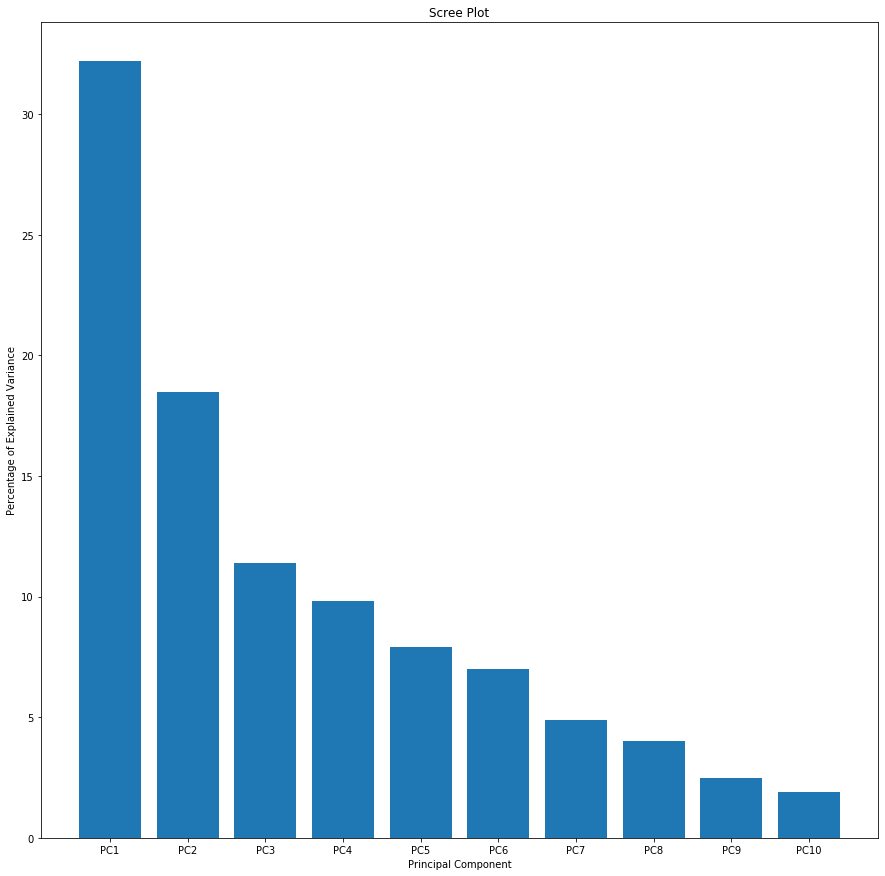

In [17]:
#use matplotlib to create a bar plot
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(per_var)+1), height= per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('PCAskreeplotall.png')
plt.show()

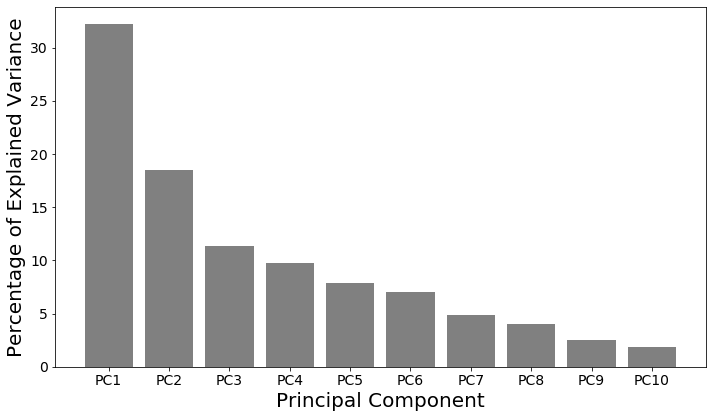

In [18]:
# Use matplotlib to create a bar plot
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(per_var)+1), height= per_var, tick_label=labels, color='gray')
plt.ylabel('Percentage of Explained Variance', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
plt.title('', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('PCAskreeplotall.png')
plt.show()

In [19]:
per_var2 = list(per_var[0:10])
print(per_var2)
labels2 = ['PC' +str(x) for x in range(1,len(per_var2)+1)]

[32.2, 18.5, 11.4, 9.8, 7.9, 7.0, 4.9, 4.0, 2.5, 1.9]


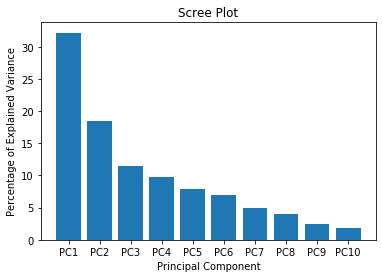

In [20]:
#use matplotlib to create a bar plot
# plt.figure(figsize=(,15))
plt.bar(x=range(1,len(per_var2)+1), height= per_var2,tick_label=labels2)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('PCAskreeplot_top10.png')
plt.show()

In [21]:
#draw a PCA plot
#first, put the new coordinates created by pca.transform(scaled.data)
#into a matrix where the rows have the participant ids and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=ids,columns=labels)
print(pca_df)
pca_df.to_csv('wtp_rej_PCA_allsubjects.csv')

                               PC1       PC2       PC3       PC4       PC5  \
Prolific_ID                                                                  
59d5888d21977e0001d630f3 -0.023922 -1.146069  1.872546  0.821707  0.956236   
5a09ebdf087f2e0001eae39f -0.507947 -0.047154  0.970395 -0.639201  0.682066   
5c5c451500b69200011bb8bf -0.199765  2.961534 -0.838744 -0.167051  0.433089   
5c9d004ee3b6c40015254526 -0.464089  1.699558  0.159131  0.312282  2.267726   
5cc3f0f9fdb33500018c5eeb -0.207667 -0.804005  1.535246 -0.389883 -0.622470   
...                            ...       ...       ...       ...       ...   
67094d6215b6d0fe3e8c3e39 -0.868652  0.992494 -0.512727  0.052362 -0.271033   
670d326c55fa3d6f10ebe253 -0.177678 -1.431182 -0.542431 -0.203524  1.106696   
6711f493bfc7c4e11953872d  1.097164 -1.070038 -2.145433  0.056424  0.231629   
671469967e2a4f2e612e3846 -1.691241 -1.171517 -0.819168  0.819193 -0.510922   
6722ca2b1f3ebd2d544608c3  0.335230 -1.405308 -0.812747  1.017974

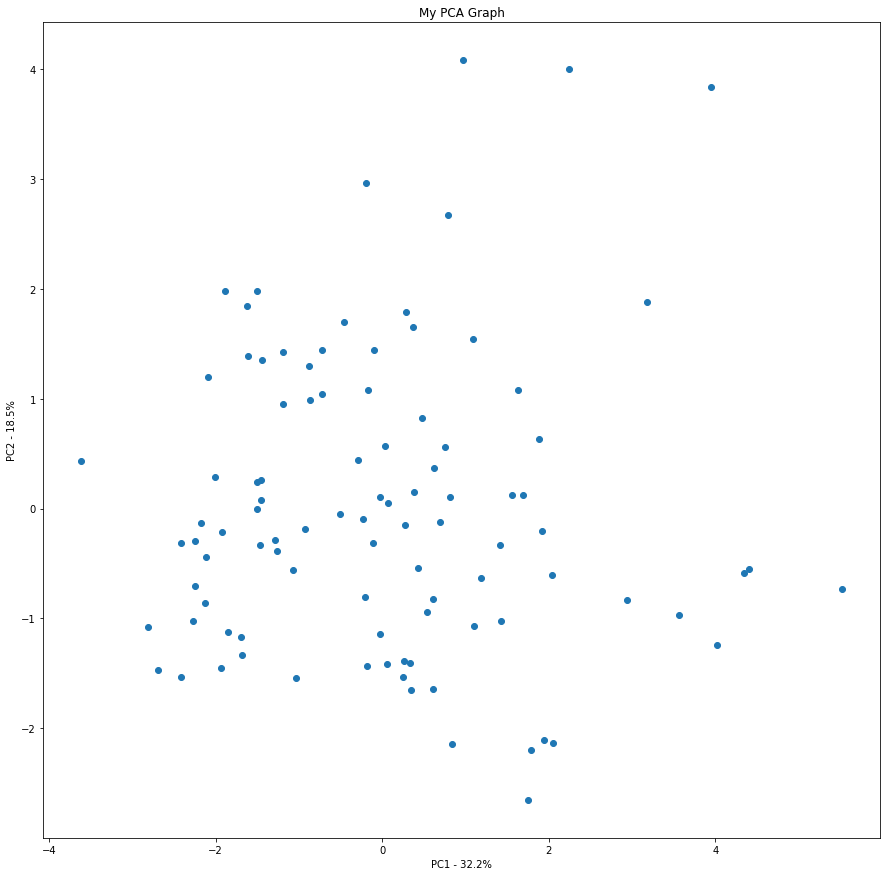

<Figure size 432x288 with 0 Axes>

In [22]:
#Visualize the distribution of the samples
#draw a scatter plot
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add sample names to graph
# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()
plt.savefig('PCAscatterplotall.png')

In [23]:
###All measures and their loading scores for PC 1

#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[0], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_measures = sorted_loading_scores.index.values
print(top_measures)

aq                   0.427662
ntbs                -0.008253
rsq                  0.264370
scs                 -0.466723
srqadmiration       -0.260149
srqnegativesocpot   -0.014867
srqsexualbehavior   -0.344518
srqprosocial        -0.164015
srqsociability      -0.431489
mspss               -0.360057
dtype: float64
['scs' 'srqsociability' 'aq' 'mspss' 'srqsexualbehavior' 'rsq'
 'srqadmiration' 'srqprosocial' 'srqnegativesocpot' 'ntbs']


In [24]:
#PC1 - top 10 measures and their corresponding loading scores
print(loading_scores[top_measures])
PC1 = pd.DataFrame(loading_scores[top_measures]).transpose()
print(PC1)
# PC1.to_csv('PC1.csv')

scs                 -0.466723
srqsociability      -0.431489
aq                   0.427662
mspss               -0.360057
srqsexualbehavior   -0.344518
rsq                  0.264370
srqadmiration       -0.260149
srqprosocial        -0.164015
srqnegativesocpot   -0.014867
ntbs                -0.008253
dtype: float64
        scs  srqsociability        aq     mspss  srqsexualbehavior      rsq  \
0 -0.466723       -0.431489  0.427662 -0.360057          -0.344518  0.26437   

   srqadmiration  srqprosocial  srqnegativesocpot      ntbs  
0      -0.260149     -0.164015          -0.014867 -0.008253  


In [25]:
###ALL measures and their loading scores for PC 2
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[1], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_measures = sorted_loading_scores.index.values

aq                  -0.050760
ntbs                -0.161646
rsq                  0.131364
scs                  0.148123
srqadmiration       -0.301188
srqnegativesocpot    0.645607
srqsexualbehavior    0.185717
srqprosocial        -0.605939
srqsociability       0.146456
mspss               -0.038371
dtype: float64


In [26]:
#PC2 -  top 10 measures and their corresponding loading scores
print(loading_scores[top_measures])
PC2 = pd.DataFrame(loading_scores[top_measures]).transpose()
# print(PC2.columns)

srqnegativesocpot    0.645607
srqprosocial        -0.605939
srqadmiration       -0.301188
srqsexualbehavior    0.185717
ntbs                -0.161646
scs                  0.148123
srqsociability       0.146456
rsq                  0.131364
aq                  -0.050760
mspss               -0.038371
dtype: float64


In [27]:
###All measures and their loading scores for PC 3

#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[2], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_measures = sorted_loading_scores.index.values

aq                  -0.238239
ntbs                -0.592975
rsq                 -0.249456
scs                  0.216209
srqadmiration       -0.546137
srqnegativesocpot   -0.283207
srqsexualbehavior   -0.282712
srqprosocial         0.023696
srqsociability      -0.127578
mspss                0.086093
dtype: float64


In [28]:
#PC 3 print top 10 measures and their corresponding loading scores
print(loading_scores[top_measures])
PC3 = pd.DataFrame(loading_scores[top_measures]).transpose()
print(PC3.columns)

ntbs                -0.592975
srqadmiration       -0.546137
srqnegativesocpot   -0.283207
srqsexualbehavior   -0.282712
rsq                 -0.249456
aq                  -0.238239
scs                  0.216209
srqsociability      -0.127578
mspss                0.086093
srqprosocial         0.023696
dtype: float64
Index(['ntbs', 'srqadmiration', 'srqnegativesocpot', 'srqsexualbehavior',
       'rsq', 'aq', 'scs', 'srqsociability', 'mspss', 'srqprosocial'],
      dtype='object')


In [29]:
selfreports = ['Autism Quotient','Need to Belong','Rejection Sensitivity','Social Connectedness ','Social Reward - Admiration', 'Social Reward - Negsocpot','Social Reward - Sexual Behavior',
               'Social Reward - Prosocial', 'Social Reward - Sociability', 'Social Support', ]

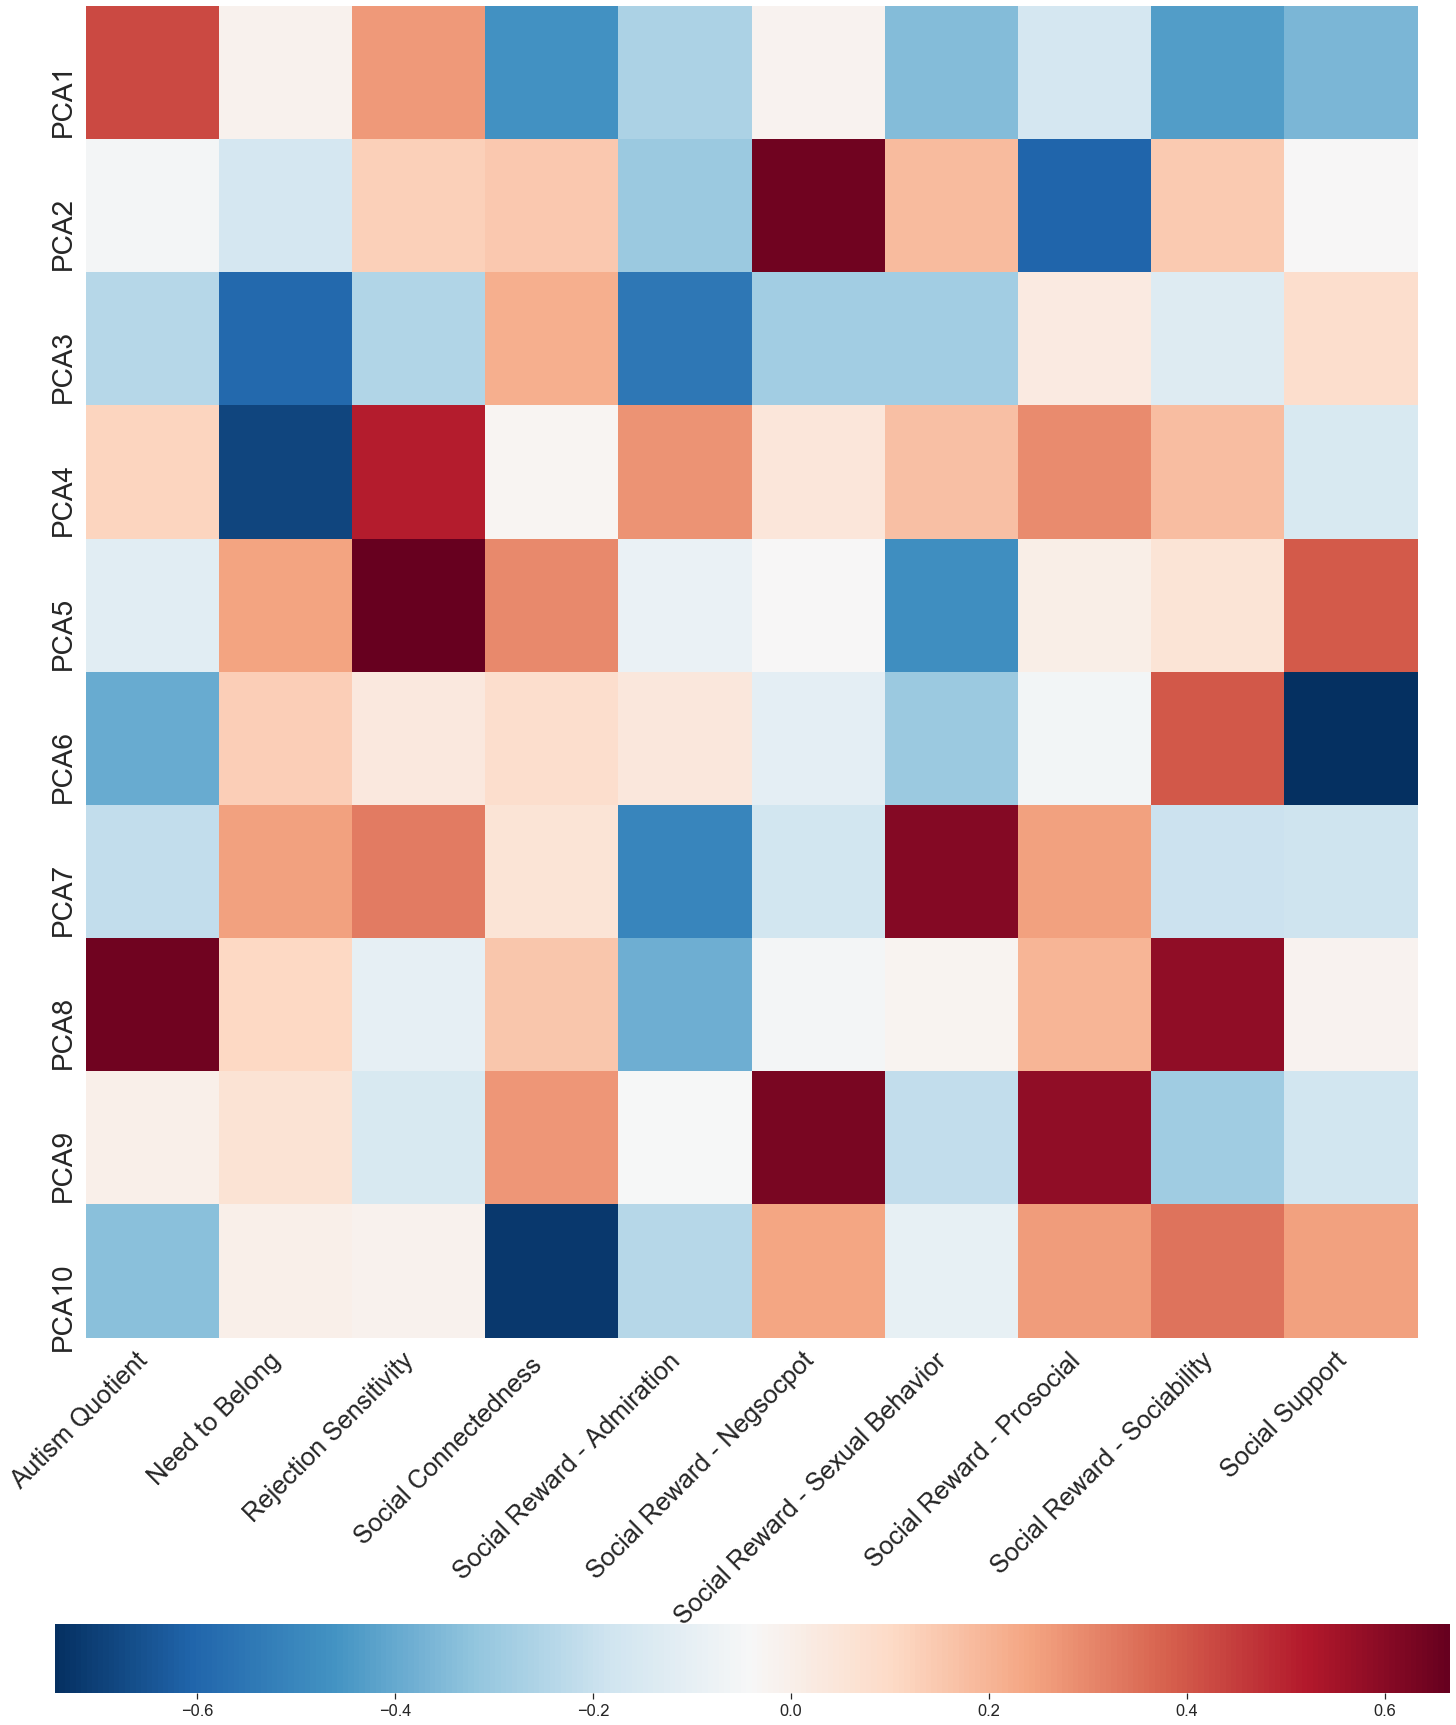

In [39]:
#sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(25,35)) 
ax = sns.heatmap(pca.components_,
                 cmap='RdBu_r',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(selfreports),
                 cbar_kws={"orientation": "horizontal"})

# Set x-tick label size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25.5, rotation=45, ha='right')

# Set y-tick label size (optional, for symmetry)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=28)

ax.set_aspect("equal")
plt.savefig('PCA_heatmap.png')

In [37]:
# In Python
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['prolific_id'] = original_data['subject_id'].values  # Or whatever grouping variable you use
#pca_df['outcome'] = original_data['outcome'].values        # Add outcome if not already in original_data
pca_df.to_csv('pca_data.csv', index=False)


ValueError: Shape of passed values is (98, 10), indices imply (98, 3)